

# **Introdução**

O presente projeto tem por objetivo a realização de um estudo sobre saúde e medicamentos no Brasil. Para tal, serão utilizadas bases de dados fornecidas por sites do governo federal, além dos conhecimentos adquiridos na disciplina de Introdução a Ciência dos Dados.

#**Tipo de produtos:**

Na tabela analisada neste projeto, possui os seguintes tipos de medicamento.
 

*   **Medicamento biológico** – aquele que contém molécula com atividade biológica conhecida e que tenha passado por todas as etapas de fabricação – formulação, envase, liofilização, rotulagem, embalagem, armazenamento, controle de qualidade e liberação do lote de produto biológico para uso (RDC nº 55, de 16 de dezembro de 2010).									

*   **Medicamento com princípios ativos sintéticos e semissintéticos** – Ao contrário dos medicamentos biológicos, sua molécula é sintética ou semissintética. Produto farmacêutico, tecnicamente obtido ou elaborado, com finalidade profilática, curativa, paliativa ou para fins de diagnóstico. Pode ser classificado como novo, genérico ou similar (RDC nº 60, de 10 de outubro de 2014).	

*    **Medicamento genérico** – medicamento similar a um produto de referência ou inovador, que se pretende que seja intercambiável com este, geralmente produzido após a expiração ou renúncia da proteção patentária ou de outros direitos de exclusividade, comprovada a sua eficácia, segurança e qualidade, e designado pela Denominação Comum Brasileira - DCB ou, na sua ausência, pela Denominação Comum Internacional - DCI (Lei nº 9.787, de 10 de fevereiro de 1999).

*    **Medicamento similar** – aquele que contém o mesmo ou os mesmos princípios ativos, que apresenta a mesma concentração, forma farmacêutica, via de administração, posologia e indicação terapêutica, e que é equivalente ao medicamento registrado no órgão federal responsável pela vigilância sanitária, podendo diferir somente em características relativas ao tamanho e à forma do produto, ao prazo de validade, à embalagem, à rotulagem, aos excipientes e aos veículos, devendo sempre ser identificado pelo nome comercial ou marca (Lei nº 9.787, de 10 de fevereiro de 1999).									
									
*   **Medicamento específico** – produto farmacêutico, tecnicamente obtido ou elaborado, com finalidade profilática, curativa ou paliativa, não enquadrado nas categorias de medicamento novo, genérico, similar, biológico, fitoterápico ou notificado e cuja(s) substância(s) ativa(s), independentemente da sua natureza ou origem, não é(são) passível(passíveis) de ensaio de bioequivalência frente a um produto comparador (RDC nº 24, de 14 de junho de 2011).						
									
*    **Medicamento fitoterápico** – obtidos com emprego exclusivo de matérias-primas ativas vegetais. Não se considera medicamento fitoterápico aquele que inclui na sua composição substâncias ativas isoladas, sintéticas ou naturais, nem as associações dessas com extratos vegetais.									



o Preço Máximo ao Consumidor (PMC), que é o preço a ser
praticado pelo comércio varejista de medicamentos, ou seja, farmácias e drogarias, tendo em
vista que este contempla tanto a margem de lucro como os impostos inerentes a esses tipos de
comércio.


# **Tratamento inicial dos dados**

A seguir, serão tratados os dados obtidos pelos datasets selecionados a fim de facilitar e tornar viável o estudo.<br/>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Inicialmente, lemos as duas bases de dados obtidas.

In [3]:
#Dataset simples
!wget https://raw.githubusercontent.com/lazarobodevan/TP-CienciaDosDados-3861-3865-3871/main/DADOS_ABERTOS_MEDICAMENTOS.csv

#Dataset com tajas
!wget https://github.com/lazarobodevan/TP-CienciaDosDados-3861-3865-3871/blob/main/medTarja.xls

--2022-07-26 11:57:55--  https://raw.githubusercontent.com/lazarobodevan/TP-CienciaDosDados-3861-3865-3871/main/DADOS_ABERTOS_MEDICAMENTOS.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5903386 (5.6M) [text/plain]
Saving to: ‘DADOS_ABERTOS_MEDICAMENTOS.csv’

DADOS_ABERTOS_MEDIC 100%[===================>]   5.63M  --.-KB/s    in 0.03s   

2022-07-26 11:57:55 (223 MB/s) - ‘DADOS_ABERTOS_MEDICAMENTOS.csv’ saved [5903386/5903386]

--2022-07-26 11:57:55--  https://github.com/lazarobodevan/TP-CienciaDosDados-3861-3865-3871/blob/main/medTarja.xls
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘medTar

In [4]:
datasetMedCons = pd.read_csv("/content/DADOS_ABERTOS_MEDICAMENTOS.csv", encoding='iso8859-1', sep = ';', on_bad_lines='skip')
datasetMedCons

,TIPO_PRODUTO,NOME_PRODUTO,DATA_FINALIZACAO_PROCESSO,CATEGORIA_REGULATORIA,NUMERO_REGISTRO_PRODUTO,DATA_VENCIMENTO_REGISTRO,NUMERO_PROCESSO,CLASSE_TERAPEUTICA,EMPRESA_DETENTORA_REGISTRO,SITUACAO_REGISTRO,PRINCIPIO_ATIVO
0,MEDICAMENTO,(VITAMINAS A ) + ASSSOCIACÕES,25/04/2000,SIMILAR,104540166,01/04/2005,25000025416,VITAMINAS E SUPLEMENTOS MINERAIS,60874187000184 - DAIICHI SANKYO BRASIL FARMACÊ...,CADUCO/CANCELADO,NaN
1,MEDICAMENTO,AC SALICILICO + AC BENZOICO + IODO,19/05/2000,SIMILAR,119350001,01/05/2005,25010171858,ANTIMICOTICOS PARA USO TOPICO,63826069000199 - LABORATORIO FLORA DA AMAZONIA...,CADUCO/CANCELADO,NaN
2,MEDICAMENTO,ALENDRONATO SODICO,04/06/2001,SIMILAR,100470305,01/05/2006,25351022805,SUPRESSORES DA REABSORCAO OSSEA,61286647000116 - SANDOZ DO BRASIL INDÚSTRIA FA...,CADUCO/CANCELADO,NaN
3,MEDICAMENTO,ARNICA MONTANA,19/03/2002,FITOTERÁPICO,104730021,01/03/2007,25025007821,FITOTERAPICO SIMPLES,92762277000170 - VIDORA FARMACÊUTICA LTDA,CADUCO/CANCELADO,NaN
4,MEDICAMENTO,ARNICA MONTANA L.,01/07/2002,FITOTERÁPICO,131750004,01/06/2007,25351032631,FITOTERAPICO SIMPLES,00925697000101 - LIMED LABORATORIO INDUSTRIAL ...,CADUCO/CANCELADO,NaN
...,...,...,...,...,...,...,...,...,...,...,...
29715,MEDICAMENTO,nimesulida,NaN,GENÉRICO,177940051,01/06/2032,25351222835,AGENTES ANTI-INFLAMATÓRIOS,09545589000188 - MABRA FARMACEUTICA LTDA,VÁLIDO,NIMESULIDA
29716,MEDICAMENTO,pantoprazol sódico sesqui-hidratado,NaN,GENÉRICO,100431438,01/06/2032,25351538852,ANTIACIDOS E ANTIULCEROSOS,61190096000192 - EUROFARMA LABORATÓRIOS S.A.,VÁLIDO,PANTOPRAZOL SÓDICO SESQUI-HIDRATADO
29717,MEDICAMENTO,paracetamol + cafeína,NaN,GENÉRICO,177940052,01/06/2032,25351239745,ANALGESICOS NAO NARCOTICOS,09545589000188 - MABRA FARMACEUTICA LTDA,VÁLIDO,CAFEÍNA ANIDRA + PARACETAMOL
29718,MEDICAMENTO,prednisolona,NaN,GENÉRICO,155840631,01/06/2032,25351544442,GLICOCORTICOIDES SISTEMICOS,05161069000110 - BRAINFARMA INDÚSTRIA QUÍMICA ...,VÁLIDO,FOSFATO SÓDICO DE PREDNISOLONA + PREDNISOLONA


In [5]:
pip install xlrd==1.2.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 103 kB 18.9 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [6]:
datasetMed = pd.read_excel("/content/drive/MyDrive/Projeto/Dados/medTarja.xls", engine='xlrd', index_col=None, header=45, skiprows = [0, 45])
datasetMed

,SUBSTÂNCIA,CNPJ,LABORATÓRIO,CÓDIGO GGREM,REGISTRO,EAN 1,EAN 2,EAN 3,PRODUTO,APRESENTAÇÃO,...,PMC 18% ALC,PMC 20%,RESTRIÇÃO HOSPITALAR,CAP,CONFAZ 87,ICMS 0%,ANÁLISE RECURSAL,LISTA DE CONCESSÃO DE CRÉDITO TRIBUTÁRIO (PIS/COFINS),COMERCIALIZAÇÃO 2020,TARJA
0,CEFALOTINA SODICA,04.301.884/0001-75,AUROBINDO PHARMA INDÚSTRIA FARMACÊUTICA LIMITADA,500100106155118,1516700060050,7898361881450,-,-,CEFALOTINA SÓDICA,1G PO SOL INJ CT 50 FA VD TRANS,...,NaN,NaN,Sim,Não,Não,Não,NaN,Positiva,Sim,Tarja Vermelha (*)
1,CEFAZOLINA SÓDICA,04.301.884/0001-75,AUROBINDO PHARMA INDÚSTRIA FARMACÊUTICA LIMITADA,500100204157115,1516700030038,7898361881405,-,-,CEFAZOLINA SÓDICA,1 G PO SOL INJ CT 50 FA VD TRANS,...,NaN,NaN,Sim,Não,Não,Não,NaN,Positiva,Sim,Tarja Vermelha (*)
2,CEFOTAXIMA SÓDICA,04.301.884/0001-75,AUROBINDO PHARMA INDÚSTRIA FARMACÊUTICA LIMITADA,500100310151117,1516700050063,7898361881412,-,-,CEFOTAXIMA SÓDICA,1 G PO SOL INJ CT 50 FA VD TRANS,...,NaN,NaN,Sim,Não,Não,Não,NaN,Positiva,Sim,Tarja Vermelha (*)
3,CLORIDRATO DE CIPROFLOXACINO,04.301.884/0001-75,AUROBINDO PHARMA INDÚSTRIA FARMACÊUTICA LIMITADA,500100410113111,1516700070099,7898361881313,-,-,CLORIDRATO DE CIPROFLOXACINO,500 MG COM REV CT 2 BL AL PLAS TRANS X 07,...,"46,26","47,42",Não,Não,Sim,Não,NaN,Positiva,Não,Tarja Vermelha (*)
4,CEFALEXINA MONOIDRATADA,04.301.884/0001-75,AUROBINDO PHARMA INDÚSTRIA FARMACÊUTICA LIMITADA,500100801112111,1516700080035,7898361880019,-,-,CEFALEXINA,500 MG COM REV CT BL AL PVC/PVDC TRANS X 8,...,"20,97","21,50",Não,Não,Não,Não,NaN,Positiva,Sim,Tarja Vermelha (*)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27192,ACETATO DE RETINOL;COLECALCIFEROL,92.265.552/0001-40,MULTILAB INDÚSTRIA E COMÉRCIO DE PRODUTOS FARM...,525917060050504,1181901840031,7896472518821,-,-,METOSAD,50000 + 10000 UI/ML SOL OR CT FR PLAS AMB GOT ...,...,"27,91","31,83",Não,Não,Não,Não,NaN,Negativa,Não,- (*)
27193,ACETATO DE DEXAMETASONA,92.265.552/0001-40,MULTILAB INDÚSTRIA E COMÉRCIO DE PRODUTOS FARM...,525921120068107,1181902220010,7896472503599,7895296449267,-,ACETATO DE DEXAMETASONA,1 MG/G CREM DERM CT BG AL X 10 G,...,"12,30","12,62",Não,Não,Não,Não,NaN,Positiva,Não,- (*)
27194,ACETATO DE DEXAMETASONA,92.265.552/0001-40,MULTILAB INDÚSTRIA E COMÉRCIO DE PRODUTOS FARM...,525921120067907,1181902240011,7896472502110,7896004782560,-,CORTITOP,1 MG/G CREM DERM CT BG AL X 10 G,...,"19,05","19,53",Não,Não,Não,Não,NaN,Positiva,Não,- (*)
27195,ACETATO DE DEXAMETASONA,92.265.552/0001-40,MULTILAB INDÚSTRIA E COMÉRCIO DE PRODUTOS FARM...,525922030071603,1181902240021,7896004782225,-,-,CORTITOP,1 MG/G CREM DERM CT BG AL X 20 G,...,"37,92","38,86",Não,Não,Não,Não,NaN,Positiva,Não,- (*)


Após tendo as bases de dados lidas, realizamos os devidos tratamentos. As operações a seguir terão como objetivo a exclusão de linhas com dados faltantes, para que facilite durante as análises mais a frente.<br/>
Removeremos as colunas EAN 2, EAN 3 e Análise Recursal pois as mesmas raramente possuem valores.

In [7]:
datasetMed.drop('EAN 2', inplace=True, axis=1)
datasetMed.drop('EAN 3', inplace=True, axis=1)
datasetMed.drop('ANÁLISE RECURSAL', inplace=True, axis=1)
datasetMed

,SUBSTÂNCIA,CNPJ,LABORATÓRIO,CÓDIGO GGREM,REGISTRO,EAN 1,PRODUTO,APRESENTAÇÃO,CLASSE TERAPÊUTICA,TIPO DE PRODUTO (STATUS DO PRODUTO),...,PMC 18%,PMC 18% ALC,PMC 20%,RESTRIÇÃO HOSPITALAR,CAP,CONFAZ 87,ICMS 0%,LISTA DE CONCESSÃO DE CRÉDITO TRIBUTÁRIO (PIS/COFINS),COMERCIALIZAÇÃO 2020,TARJA
0,CEFALOTINA SODICA,04.301.884/0001-75,AUROBINDO PHARMA INDÚSTRIA FARMACÊUTICA LIMITADA,500100106155118,1516700060050,7898361881450,CEFALOTINA SÓDICA,1G PO SOL INJ CT 50 FA VD TRANS,J1D2 - CEFALOSPORINAS INJETÁVEIS,Genérico,...,NaN,NaN,NaN,Sim,Não,Não,Não,Positiva,Sim,Tarja Vermelha (*)
1,CEFAZOLINA SÓDICA,04.301.884/0001-75,AUROBINDO PHARMA INDÚSTRIA FARMACÊUTICA LIMITADA,500100204157115,1516700030038,7898361881405,CEFAZOLINA SÓDICA,1 G PO SOL INJ CT 50 FA VD TRANS,J1D2 - CEFALOSPORINAS INJETÁVEIS,Genérico,...,NaN,NaN,NaN,Sim,Não,Não,Não,Positiva,Sim,Tarja Vermelha (*)
2,CEFOTAXIMA SÓDICA,04.301.884/0001-75,AUROBINDO PHARMA INDÚSTRIA FARMACÊUTICA LIMITADA,500100310151117,1516700050063,7898361881412,CEFOTAXIMA SÓDICA,1 G PO SOL INJ CT 50 FA VD TRANS,J1D2 - CEFALOSPORINAS INJETÁVEIS,Genérico,...,NaN,NaN,NaN,Sim,Não,Não,Não,Positiva,Sim,Tarja Vermelha (*)
3,CLORIDRATO DE CIPROFLOXACINO,04.301.884/0001-75,AUROBINDO PHARMA INDÚSTRIA FARMACÊUTICA LIMITADA,500100410113111,1516700070099,7898361881313,CLORIDRATO DE CIPROFLOXACINO,500 MG COM REV CT 2 BL AL PLAS TRANS X 07,J1G1 - FLUORQUINOLONAS ORAIS,Genérico,...,"46,26","46,26","47,42",Não,Não,Sim,Não,Positiva,Não,Tarja Vermelha (*)
4,CEFALEXINA MONOIDRATADA,04.301.884/0001-75,AUROBINDO PHARMA INDÚSTRIA FARMACÊUTICA LIMITADA,500100801112111,1516700080035,7898361880019,CEFALEXINA,500 MG COM REV CT BL AL PVC/PVDC TRANS X 8,J1D1 - CEFALOSPORINAS ORAIS,Genérico,...,"20,97","20,97","21,50",Não,Não,Não,Não,Positiva,Sim,Tarja Vermelha (*)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27192,ACETATO DE RETINOL;COLECALCIFEROL,92.265.552/0001-40,MULTILAB INDÚSTRIA E COMÉRCIO DE PRODUTOS FARM...,525917060050504,1181901840031,7896472518821,METOSAD,50000 + 10000 UI/ML SOL OR CT FR PLAS AMB GOT ...,A11C3 - ASSOCIAÇÕES VITAMINAS A COM D,-,...,"30,95","27,91","31,83",Não,Não,Não,Não,Negativa,Não,- (*)
27193,ACETATO DE DEXAMETASONA,92.265.552/0001-40,MULTILAB INDÚSTRIA E COMÉRCIO DE PRODUTOS FARM...,525921120068107,1181902220010,7896472503599,ACETATO DE DEXAMETASONA,1 MG/G CREM DERM CT BG AL X 10 G,D7A - CORTICOESTERÓIDES TÓPICOS PUROS,Genérico,...,"12,30","12,30","12,62",Não,Não,Não,Não,Positiva,Não,- (*)
27194,ACETATO DE DEXAMETASONA,92.265.552/0001-40,MULTILAB INDÚSTRIA E COMÉRCIO DE PRODUTOS FARM...,525921120067907,1181902240011,7896472502110,CORTITOP,1 MG/G CREM DERM CT BG AL X 10 G,D7A - CORTICOESTERÓIDES TÓPICOS PUROS,Similar,...,"19,05","19,05","19,53",Não,Não,Não,Não,Positiva,Não,- (*)
27195,ACETATO DE DEXAMETASONA,92.265.552/0001-40,MULTILAB INDÚSTRIA E COMÉRCIO DE PRODUTOS FARM...,525922030071603,1181902240021,7896004782225,CORTITOP,1 MG/G CREM DERM CT BG AL X 20 G,D7A - CORTICOESTERÓIDES TÓPICOS PUROS,Similar,...,"37,92","37,92","38,86",Não,Não,Não,Não,Positiva,Não,- (*)


In [8]:
datasetMedCons['NOME_PRODUTO'] = datasetMedCons['NOME_PRODUTO'].str.upper()

**Convertendo os dados para tipo numérico**

In [9]:
datasetMed['PMC 0%'] = datasetMed['PMC 0%'].str.replace(',', '.')
datasetMed['PMC 17%'] = datasetMed['PMC 17%'].str.replace(',', '.')
datasetMed['PMC 18%'] = datasetMed['PMC 18%'].str.replace(',', '.')
datasetMed['PMC 20%'] = datasetMed['PMC 20%'].str.replace(',', '.')
datasetMed['PF 0%'] = datasetMed['PF 0%'].str.replace(',', '.')
datasetMed['PF Sem Impostos'] = datasetMed['PF Sem Impostos'].str.replace(',', '.')

datasetMed['PMC 0%'] = datasetMed['PMC 0%'].astype(float)
datasetMed['PMC 17%'] = datasetMed['PMC 17%'].astype(float)
datasetMed['PMC 18%'] = datasetMed['PMC 18%'].astype(float)
datasetMed['PMC 20%'] = datasetMed['PMC 20%'].astype(float)
datasetMed['PF 0%'] = datasetMed['PF 0%'].astype(float)
datasetMed['PF Sem Impostos'] = datasetMed['PF Sem Impostos'].astype(float)

**Tratamento das Tarjas**<br/>
<p>Como é possível ver, existe mais de uma ocorrência para um mesmo tipo de tarja, sendo estas diferenciadas apenas por um espaço espaço a mais ou a menos. Sendo assim, esses valores devem ser tratados para que sejam únicos.</p>

In [10]:
def map_tarjas(tarja):
  if tarja in ['Tarja Vermelha (*)','Tarja Vermelha(*)','Tarja  Vermelha', 'Tarja Vermelha', 'Tarja Vermelha sob restrição']:
    return 'Tarja Vermelha'
  if tarja in ['Tarja Preta(*)','Tarja  Preta']:
    return 'Tarja Preta'
  if tarja in ['Tarja Venda Livre/Sem Tarja (*)', 'Tarja Venda Livre', 'Tarja -(*)', '- (*) ','Tarja Sem Tarja']:
    return 'Sem Tarja'

datasetMed['TARJA'] = datasetMed['TARJA'].apply(map_tarjas)
datasetMed['TARJA'].unique()

array(['Tarja Vermelha', 'Tarja Preta', 'Sem Tarja'], dtype=object)

# **Análises**

### **Utils**

In [11]:
#Colunas do dataset
datasetMed.columns

Index(['SUBSTÂNCIA', 'CNPJ', 'LABORATÓRIO', 'CÓDIGO GGREM', 'REGISTRO',
       'EAN 1', 'PRODUTO', 'APRESENTAÇÃO', 'CLASSE TERAPÊUTICA',
       'TIPO DE PRODUTO (STATUS DO PRODUTO)', 'REGIME DE PREÇO',
       'PF Sem Impostos', 'PF 0%', 'PF 12%', 'PF 17%', 'PF 17% ALC',
       'PF 17,5%', 'PF 17,5% ALC', 'PF 18%', 'PF 18% ALC', 'PF 20%', 'PMC 0%',
       'PMC 12%', 'PMC 17%', 'PMC 17% ALC', 'PMC 17,5%', 'PMC 17,5% ALC',
       'PMC 18%', 'PMC 18% ALC', 'PMC 20%', 'RESTRIÇÃO HOSPITALAR', 'CAP',
       'CONFAZ 87', 'ICMS 0%',
       'LISTA DE CONCESSÃO DE CRÉDITO TRIBUTÁRIO (PIS/COFINS)',
       'COMERCIALIZAÇÃO 2020', 'TARJA'],
      dtype='object')

É importante citar algumas notas presentes no dataset usado.

As alícotas são um percentual usado para calcular o valor final de um imposto que deve ser pago por uma pessoa física ou jurídica. No Brasil, cada estado tem sua própria alíquota:

*   ICMS 20% - RJ
*   ICMS 18% - AM, BA, CE, MA, MG, PB, PE, PI, PR, RN, SE, SP.
*   ICMS 17,5% - RO e RO.





###**1)** Qual a quantididade de remédios autorizados no Brasil?

In [58]:
quantRemedios = datasetMedCons['NOME_PRODUTO'].count()
quantRemedios
print('Foram autorizados {} medicamentos.'.format(quantRemedios))
#print('\n'.join(nomesRemedios))

Foram autorizados 29720 medicamentos.


###**2)** Qual a quantidade de remédios fornecidos por laboratório?

In [13]:
quantidade = datasetMed
quantidade = quantidade.groupby('LABORATÓRIO')['SUBSTÂNCIA'].count().tolist()

In [14]:
nomesLabs = sorted(datasetMed['LABORATÓRIO'].unique())
nomesLabs
lab_quantidade = pd.DataFrame({'Laboratório': nomesLabs,
                   'Quantidade': quantidade})
lab_quantidade

,Laboratório,Quantidade
0,1FARMA INDUSTRIA FARMACEUTICA LTDA,108
1,ABBOTT LABORATÓRIOS DO BRASIL LTDA,234
2,ABBVIE FARMACÊUTICA LTDA.,36
3,ACCORD FARMACÊUTICA LTDA,292
4,ACHÉ LABORATÓRIOS FARMACÊUTICOS S.A,1183
...,...,...
266,WASSER FARMA LTDA,3
267,WYETH INDÚSTRIA FARMACÊUTICA LTDA,269
268,ZAMBON LABORATÓRIOS FARMACÊUTICOS LTDA.,50
269,ZODIAC PRODUTOS FARMACÊUTICOS S/A,194


###**3)** Qual laboratório possui maior quantidade de remédios autorizados?

In [15]:
lab_mais_remedios = lab_quantidade.sort_values(by='Quantidade', ascending=False)
lab_mais_remedios.head(1)

,Laboratório,Quantidade
80,EMS S/A,1574


### **4)** Qual a quantidade de remédios por tipo de tarja?

In [16]:
tarjas = datasetMed['TARJA'].unique()
tarjas

array(['Tarja Vermelha', 'Tarja Preta', 'Sem Tarja'], dtype=object)

**Com os dados tratados, podemos seguir com a análise.**

In [17]:
quantidade_tarja = datasetMed
quantidade_tarja = quantidade_tarja.groupby('TARJA')['TARJA'].count()
quantidade_tarja

TARJA
Sem Tarja          4712
Tarja Preta         551
Tarja Vermelha    21934
Name: TARJA, dtype: int64

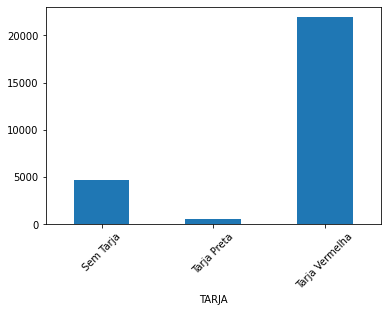

In [18]:
quantidade_tarja.plot.bar()
plt.xticks(rotation = 45)
plt.show()

### **5)** Qual a média do preço ao consumidor em cada estado do sudeste (MG/SP 18%; RJ 20%; ES 17%)?

**Tratamento dos dados**
<p>Primeiramente, temos que remover todas as linhas cujas colunas PMC 17%, 18% ou 20% são nulas. Isso será necessário para que não haja viés na média calculada, mesmo perdendo parte dos dados.</p>

In [59]:
dfDatasetMed = datasetMed
dfDatasetMed = dfDatasetMed[dfDatasetMed['PMC 17%'].notna()]
dfDatasetMed = dfDatasetMed[dfDatasetMed['PMC 18%'].notna()]
dfDatasetMed = dfDatasetMed[dfDatasetMed['PMC 20%'].notna()]

**Observamos a porcentagem de perda de dados**

In [20]:
original= len(datasetMed.index)
novo = len(dfDatasetMed.index)
print("Antes: ",original, "\nDepois:",novo)

Antes:  27197 
Depois: 22376


In [21]:
perda = (len(dfDatasetMed.index * 100)/len(datasetMed.index))
print(round(perda,2),"%")

0.82 %


**Realizando a análise sobre os dados**

In [22]:
ES = int(datasetMed['PMC 17%'].mean())
MGSP = int(datasetMed['PMC 18%'].mean())
RJ = int(datasetMed['PMC 20%'].mean())
print(ES, MGSP, RJ)

estadosMedia = pd.DataFrame({'Estado': ["ES", "MGSP", "RJ"],'Média':[ES, MGSP, RJ]}, index=["ES", "MGSP", "RJ"])

estadosMedia
#RJ = datasetMed['PMC 20%'].mean()

1082 1096 1125


,Estado,Média
ES,ES,1082
MGSP,MGSP,1096
RJ,RJ,1125


Como é possível ver, os valores são muito próximos. Plotando um gráfico de barras, temos:

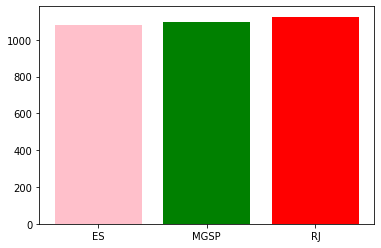

In [23]:
graph = plt.bar(estadosMedia['Estado'],estadosMedia['Média'], color=['pink','green','red'])
plt.show()

Como é possível ver, os valores obtidos são muito próximos, o que dificulta a visualização no gráfico. Alterando a escala no eixo y para logarítmica, será possível enxergar melhor essa diferença.

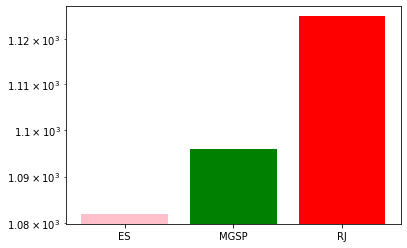

In [24]:
graph = plt.bar(estadosMedia['Estado'],estadosMedia['Média'], color=['pink','green','red'])
plt.yscale('log')
plt.show()

###**6)** Qual a média de preço de fábrica dos medicamentos tarja vermelha?

Primeiramente temos que pegar apenas os medicamentos com a Tarja Vermelha.

In [25]:
varTarjaVermelha = datasetMed[datasetMed['TARJA'] == 'Tarja Vermelha']

Após mostrar apenas os medicamentos com tarja Vermelha, a quantidade de dados obtidos é mostrado abaixo.

In [26]:
novo = len(varTarjaVermelha.index)
print("Quantidade de Remédios com a Tarja Vermelha:",novo)

Quantidade de Remédios com a Tarja Vermelha: 21934


Agora analisando a média, mediana e moda.

In [27]:
varTarjaVermelha = datasetMed[datasetMed['TARJA'] == 'Tarja Vermelha']

mediaTarjaVermelha = varTarjaVermelha['PF 0%'].mean()
modaTarjaVermelha = varTarjaVermelha['PF 0%'].mode()
medianaTarjaVermelha = varTarjaVermelha['PF 0%'].median()
print("Média: ", round(mediaTarjaVermelha,2))
print("Moda: ", modaTarjaVermelha.tolist())
print("Mediana: ", medianaTarjaVermelha)

Média:  8467.46
Moda:  [66.1, 7197166.63]
Mediana:  73.105


Ao ver os valores acima, vemos que a média não reflete a real situação dos preços dos medicamentos. Isso pode ser visto pela moda, visto que um produto de mais de 7 milhões de reais aparece com certa frequência.
<p>Portanto, podemos dizer que os preços giram em torno de 66 reais levando em consideração a mediana e o primeiro valor da moda, sendo o segundo valor um outlier dos dados</p>

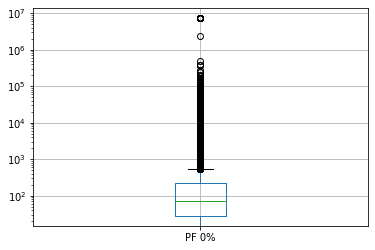

In [28]:
varTarjaVermelha.boxplot(column=['PF 0%'])
plt.yscale('log')
plt.show()

Vemos que os valores são muito dispersos, pois há diversos outliers e com grande distância dos quartis.

###**7)** Qual a média de preço de fábrica dos medicamentos tarja preta?

Em primeira análise, pegamos apenas os medicamentos com a Tarja Preta.

In [29]:
varTarjaPreta = datasetMed[datasetMed['TARJA'] == 'Tarja Preta']

Após mostrar apenas os medicamentos com tarja Preta, a quantidade de dados obtidos é mostrado abaixo.

In [30]:
novo = len(varTarjaPreta.index)
print("Quantidade de Remédios com a Tarja Preta:",novo)

Quantidade de Remédios com a Tarja Preta: 551


Agora analisando a média, mediana e a moda.

In [31]:
varTarjaPreta = datasetMed[datasetMed['TARJA'] == 'Tarja Preta']
mediaTarjaPreta = varTarjaPreta['PF 0%'].mean()
modaTarjaPreta = varTarjaPreta['PF 0%'].mode()
medianaTarjaPreta = varTarjaPreta['PF 0%'].median()
desvio = varTarjaPreta['PF 0%'].std()
print("Média: ", round(mediaTarjaPreta,2))
print("Moda: ", modaTarjaPreta.tolist())
print("Mediana: ", medianaTarjaPreta)
print("Desvio: ", desvio)

Média:  185.71
Moda:  [320.41]
Mediana:  48.29
Desvio:  565.1703920586581


Ao analisar os valores acima, percebe-se que a média não reflete a real situação dos preços dos medicamentos, principalmente quando vamos analisar o desvio.

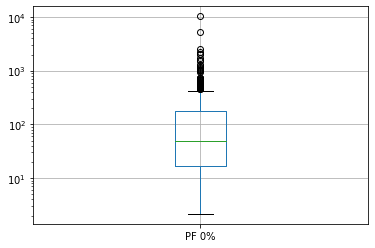

In [32]:
varTarjaPreta.boxplot(column=['PF 0%'])
plt.yscale('log')
plt.show()

Analisando o gráfico, vemos que os valores são muito dispersos, pois há diversos outliers e com grande distância dos quartis.

###**8)** Qual a quantidade de medicamentos com PIS/CONFIS positiva e negativa?

Em primeira análise, temos o total de dados com PIS/CONFIS positivo ou negativo.

In [33]:
TodosDados = len(datasetMed)
print('Quantidade de PIS/COFINS Total:',int(TodosDados))

Quantidade de PIS/COFINS Total: 27197


Agora pegando apenas o PIS/CONFIS positivos:

In [34]:
varPISCONFIS = datasetMed[datasetMed['LISTA DE CONCESSÃO DE CRÉDITO TRIBUTÁRIO (PIS/COFINS)'] == 'Positiva']
varPISCONFIS
quantidade = len(varPISCONFIS)
print("Quantidade de PIS/COFINS Positivo: ",int(quantidade))
#lab_quantidade = pd.DataFrame({'LISTA DE CONCESSÃO DE CRÉDITO TRIBUTÁRIO (PIS/COFINS)': varPISCONFIS,
#                   'Quantidade': quantidad})
#lab_quantidade

Quantidade de PIS/COFINS Positivo:  18570


Pegando apenas valores Negativos:

In [35]:
varPISCONFISNEG = datasetMed[datasetMed['LISTA DE CONCESSÃO DE CRÉDITO TRIBUTÁRIO (PIS/COFINS)'] == 'Negativa']
varPISCONFISNEG
quantidadeNEG = len(varPISCONFISNEG)
print("Quantidade de PIS/COFINS Negativo: ", int(quantidadeNEG))

Quantidade de PIS/COFINS Negativo:  8529


Em segunda análise, utilizamos um histograma.

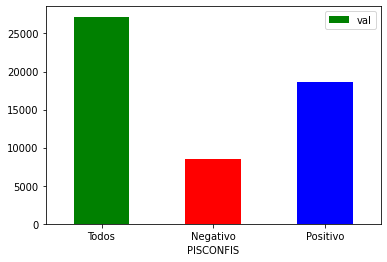

In [36]:
dff = pd.DataFrame({'PISCONFIS':['Todos', 'Negativo', 'Positivo'], 'val':[TodosDados, quantidadeNEG, quantidade]})

graph = dff.plot.bar(x='PISCONFIS', y='val', rot=0, color=['green', 'red', 'blue'] )
graph


#estadosMedia = pd.DataFrame({'LISTA DE CONCESSÃO DE CRÉDITO TRIBUTÁRIO (PIS/COFINS)': ["Positiva", "NEgativa"],'Média':[ES, MGSP, RJ]}, index=["ES", "MGSP", "RJ"])
#graph = plt.bar(estadosMedia['Estado'],estadosMedia['Média'], color=['pink','green','red'])
#plt.yscale('log')
#plt.show()

###**9)** Qual laboratório possui a lista de concessão de crédito tributário com mais medicamentos em positivo?

Analisando qual laboratorio possui a concessão de crédito tributário com mais medicamentos positivos, em primeiro lugar, recolhemos os dados de todos os laboratorios com a concessão positiva.

In [37]:
varPISCONFIS = datasetMed[datasetMed['LISTA DE CONCESSÃO DE CRÉDITO TRIBUTÁRIO (PIS/COFINS)'] == 'Positiva']
quantidade = varPISCONFIS
quantidade = quantidade.groupby('LABORATÓRIO')['LISTA DE CONCESSÃO DE CRÉDITO TRIBUTÁRIO (PIS/COFINS)'].count().tolist()
nomesLabs = sorted(varPISCONFIS['LABORATÓRIO'].unique())

Com isso, foi criada uma tabela com o nome do laboratório e a quantidade de concessão que ele tem. 

In [38]:
lab_quantidade = pd.DataFrame({'Laboratório': nomesLabs,
                   'Quantidade': quantidade})
lab_quantidade
df2 = lab_quantidade.sort_values('Quantidade', ascending=False)
df2

,Laboratório,Quantidade
65,EMS S/A,1059
4,ACHÉ LABORATÓRIOS FARMACÊUTICOS S.A,850
87,GERMED FARMACEUTICA LTDA,718
68,EUROFARMA LABORATÓRIOS S.A.,708
164,PRATI DONADUZZI & CIA LTDA,688
...,...,...
178,SILVESTRE LABS QUÍMICA E FARMACÊUTICA LTDA,1
138,MAWDSLEYS PHARMACEUTICALS DO BRASIL LTDA,1
116,LABORATÓRIO FARMACÊUTICO VITAMED LTDA,1
61,DLA PHARMACEUTICAL LTDA,1


Com isso, o laboratório que possui maior número de concessão:  

In [39]:
df2.loc[65]

Laboratório    EMS S/A
Quantidade        1059
Name: 65, dtype: object

###**10)** Qual laboratório possui a lista de concessão de crédito tributário com mais medicamentos em negativo?

Analisando qual laboratorio possui a concessão de crédito tributário com mais medicamentos positivos, em primeiro lugar, recolhemos os dados de todos os laboratorios com a concessão negativa.

In [40]:
varPISCONFIS = datasetMed[datasetMed['LISTA DE CONCESSÃO DE CRÉDITO TRIBUTÁRIO (PIS/COFINS)'] == 'Negativa']
quantidadeNEG = varPISCONFIS
quantidadeNEG = quantidadeNEG.groupby('LABORATÓRIO')['LISTA DE CONCESSÃO DE CRÉDITO TRIBUTÁRIO (PIS/COFINS)'].count().tolist()
nomesLabs = sorted(varPISCONFIS['LABORATÓRIO'].unique())

Com isso, foi criada uma tabela com o nome dos laboratórios e a quantidade de concessão que ele tem.

In [41]:
lab_quantidade = pd.DataFrame({'Laboratório': nomesLabs,
                   'Quantidade': quantidadeNEG})
lab_quantidade
df3 = lab_quantidade.sort_values('Quantidade', ascending=False)
df3

,Laboratório,Quantidade
67,EMS S/A,515
4,ACHÉ LABORATÓRIOS FARMACÊUTICOS S.A,333
56,COSMED INDUSTRIA DE COSMETICOS E MEDICAMENTOS ...,316
197,SANOFI MEDLEY FARMACÊUTICA LTDA.,313
146,LEGRAND PHARMA INDÚSTRIA FARMACÊUTICA LTDA,275
...,...,...
162,MOKSHA8 BRASIL INDUSTRIA E COMERCIO DE MEDICAM...,1
93,GLOBAL REGULATORY PARTNERS BRASIL EIRELI,1
188,PINUS INDUSTRIA QUIMICA E FARMACEUTICA LTDA,1
155,MEDA PHARMA IMPORTAÇÃO E EXPORTAÇÃO DE PRODUTO...,1


O Laboratório com maior numero de concessão Negativa é:

In [42]:
df3.loc[67]

Laboratório    EMS S/A
Quantidade         515
Name: 67, dtype: object

###**12**- Qual a porcentagem de remédios que possuem e não possuem restrição hospitalar?

In [43]:
restricaoNegada = datasetMed[datasetMed['RESTRIÇÃO HOSPITALAR'] == 'Não']
restricaoAceita = datasetMed[datasetMed['RESTRIÇÃO HOSPITALAR'] == 'Sim']
Total = datasetMed['RESTRIÇÃO HOSPITALAR'].count()


restricaoNegada = restricaoNegada['RESTRIÇÃO HOSPITALAR'].count()
restricaoAceita = restricaoAceita['RESTRIÇÃO HOSPITALAR'].count()
restricaoAceita


porcNegada = (restricaoNegada/Total)*100
porcAceita = (restricaoAceita/Total)*100

print('Porcentagem Negada = {:.2f}% '.format(porcNegada))
print('Porcentagem Aceita = {:.2f}%'.format(porcAceita))


Porcentagem Negada = 83.26% 
Porcentagem Aceita = 16.74%


###**13**- Em 2020, quais os 3 medicamentos mais comercializados?

In [44]:
varPISCONFIS = datasetMed[datasetMed['COMERCIALIZAÇÃO 2020'] == 'Sim']
quantidadeNEG = varPISCONFIS
quantidadeNEG = quantidadeNEG.groupby('PRODUTO')['COMERCIALIZAÇÃO 2020'].count()


In [45]:
lab_quantidade = pd.DataFrame({'Quantidade': quantidadeNEG})
lab_quantidade
df3 = lab_quantidade.sort_values('Quantidade', ascending=False)
df3

,Quantidade
PRODUTO,
CITRATO DE SILDENAFILA,54
PARACETAMOL,53
AMOXICILINA,53
OXALATO DE ESCITALOPRAM,53
RISPERIDONA,50
...,...
NITRATO DE OXICONAZOL,1
DIBEDERM,1
NITRAPAN,1


Os três medicamentos mais comercializados foram:


1.   CITRATO DE SILDENAFILA
2.   PARACETAMOL
3.   AMOXICILINA



###**14** - Qual a porcentagem de medicamentos foi comercializada em 2020?

In [46]:
naoComercializada = datasetMed[datasetMed['COMERCIALIZAÇÃO 2020'] == 'Não']
comercializada = datasetMed[datasetMed['COMERCIALIZAÇÃO 2020'] == 'Sim']
Total = datasetMed['COMERCIALIZAÇÃO 2020'].count()


naoComercializada = naoComercializada['COMERCIALIZAÇÃO 2020'].count()
comercializada = comercializada['COMERCIALIZAÇÃO 2020'].count()

Ncomer = (naoComercializada/Total)*100
comer = (comercializada/Total)*100

print('Porcentagem Negada = {:.2f}% '.format(Ncomer))
print('Porcentagem Aceita = {:.2f}%'.format(comer))

Porcentagem Negada = 53.38% 
Porcentagem Aceita = 46.62%


###**15**- Qual a média de preço de fábrica sem imposto dos antidepressivos?

In [47]:
antidepressivo = datasetMed[datasetMed['CLASSE TERAPÊUTICA'].str.contains('ANTIDEPRESSIVOS')]
antidepressivo[['CLASSE TERAPÊUTICA', 'PF Sem Impostos']]

,CLASSE TERAPÊUTICA,PF Sem Impostos
14,N6A4 - ANTIDEPRESSIVOS SSRI,43.60
20,N6A4 - ANTIDEPRESSIVOS SSRI,42.65
24,N6A4 - ANTIDEPRESSIVOS SSRI,47.56
25,N6A9 - ANTIDEPRESSIVOS TODOS OS OUTROS,63.45
26,N6A9 - ANTIDEPRESSIVOS TODOS OS OUTROS,90.18
...,...,...
26436,N6A9 - ANTIDEPRESSIVOS TODOS OS OUTROS,10.00
26437,N6A9 - ANTIDEPRESSIVOS TODOS OS OUTROS,34.84
26713,N6A4 - ANTIDEPRESSIVOS SSRI,53.79
26774,N6A2 - ANTIDEPRESSIVOS DE ORIGEM HERBÁCEA,30.57


In [48]:
mediaantidepressivo = antidepressivo['PF Sem Impostos'].mean()
mediaantidepressivo

197.28095658572485

###**16**- Qual a diferença média de preço de fábrica entre antidepressivos e antipsicóticos?

In [49]:
antipsicotico = datasetMed[datasetMed['CLASSE TERAPÊUTICA'].str.contains('ANTIPSICÓTICO')]
antipsicotico[['CLASSE TERAPÊUTICA', 'PF Sem Impostos']]

,CLASSE TERAPÊUTICA,PF Sem Impostos
52,N5A1 - ANTIPSICÓTICOS ATÍPICOS,98.89
53,N5A1 - ANTIPSICÓTICOS ATÍPICOS,197.83
187,N5A1 - ANTIPSICÓTICOS ATÍPICOS,55.66
188,N5A1 - ANTIPSICÓTICOS ATÍPICOS,119.28
189,N5A1 - ANTIPSICÓTICOS ATÍPICOS,198.80
...,...,...
26705,N5A1 - ANTIPSICÓTICOS ATÍPICOS,40.86
26813,N5A1 - ANTIPSICÓTICOS ATÍPICOS,164.38
26814,N5A1 - ANTIPSICÓTICOS ATÍPICOS,352.40
26815,N5A1 - ANTIPSICÓTICOS ATÍPICOS,586.56


In [50]:
mediaantipsicotico = antipsicotico['PF Sem Impostos'].mean()
mediaantipsicotico

475.14014687882496

In [51]:
dif = mediaantipsicotico - mediaantidepressivo
dif 

277.85919029310014

###**17)** Quais vacinas foram comercializadas em 2020

In [52]:
vacina = datasetMed[datasetMed['CLASSE TERAPÊUTICA'].str.contains('VACINA')]
vacina = vacina[vacina['COMERCIALIZAÇÃO 2020'] == 'Sim']
vacina = vacina[['CLASSE TERAPÊUTICA', 'COMERCIALIZAÇÃO 2020']]
vacina['CLASSE TERAPÊUTICA'].unique()

array(['J7E1 - VACINA PARA GRIPE (INFLUENZA)',
       'J7X - TODOS OS OUTROS PRODUTOS VACINAIS',
       'J7D6 - VACINA CONTRA TUBERCULOSE',
       'J7D2 - VACINAS MENINGOCÓCICAS', 'J7E4 - VACINA PARA HEPATITE',
       'J7B1 - ASSOCIAÇÔES COM VACINA ANTITETÂNICA',
       'J7D1 - VACINAS PARA PNEUMONIA',
       'J7B2 - ASSOCIAÇÔES COM VACINA ANTI-SARAMPO E PAROTIDITE',
       'J7E2 - VACINA CONTRA VARICELLA',
       'J7E3 - VACINA CONTRA HPV (PAPILOMAVIRUS HUMANO)',
       'J7E5 - VACINA CONTRA ROTAVÍRUS',
       'J7E9 - TODAS OUTRAS VACINAS VIRAIS',
       'J7D3 - VACINAS HAEMOPHILUS B',
       'J7D4 - VACINA PARA FEBRE TIFÓIDE E PARATIFÓIDE'], dtype=object)

###**18)** O quão disperso estão os dados do valor de fabricação e os valores de preço máximo ao consumidor (0% ICMS)?



In [53]:
datasetMed['PMC 0%'] = datasetMed['PMC 0%'].fillna(0)

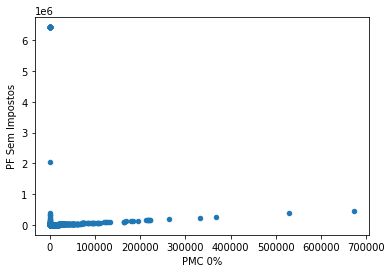

In [54]:

datasetMed.plot.scatter(x = 'PMC 0%', y = 'PF Sem Impostos')
plt.ylabel("PF Sem Impostos")
plt.xlabel("PMC 0%")
plt.show()

Com o gráfico acima podemos concluir que possuem uma dispersão muito grande entre os valores. Porém, possui uma concentração grande de valores entre 0 a 100000.

###**19)** Qual seria a média do preço de fabrica dos medicamentos de com tarja de venda livre(que não precisam de receita)?

In [55]:
vendalivre = datasetMed[datasetMed['TARJA']=='Sem Tarja']
media = vendalivre['PF 0%'].mean()
media


325.8834019524618

###**20** - Qual tarja possui a maior frequência na base de dados?


In [56]:
tarjas = datasetMed['TARJA'].value_counts()
tarjas

Tarja Vermelha    21934
Sem Tarja          4712
Tarja Preta         551
Name: TARJA, dtype: int64

A tarja que possui a maior frequência na base de dados utilizada é a Tarja vermelha - 21934.